In [1]:
import sys
sys.path.append("../scripts/")
import pandas as pd
from generate_link_lists import all_content
import numpy as np

In [2]:
data = all_content("../resources/")
data["resources"][:3]

[{'authors': ['Elisabeth Kugler'],
  'name': 'Sharing Your Poster on Figshare: A Community Guide to How-To and Why',
  'proficiency_level': 'novice',
  'tags': ['Sharing', 'Research Data Management', 'include in DALIA'],
  'type': ['Blog Post'],
  'url': 'https://focalplane.biologists.com/2023/07/26/sharing-your-poster-on-figshare/',
  'uuid': '63067620-fda2-407d-97f4-2f7c78bd5f9c'},
 {'authors': ['Marcelo Zoccoler'],
  'license': 'CC-BY-4.0',
  'name': 'Running Deep-Learning Scripts in the BiA-PoL Omero Server',
  'proficiency_level': 'proficient',
  'tags': ['Python',
   'Artificial Intelligence',
   'Bioimage Analysis',
   'include in DALIA'],
  'type': ['Blog Post'],
  'url': 'https://biapol.github.io/blog/marcelo_zoccoler/omero_scripts/readme.html',
  'uuid': '9d158030-2d9c-41f5-b119-2878a9186e60'},
 {'authors': ['Robert Haase'],
  'license': 'CC-BY-4.0',
  'name': 'Browsing the Open Microscopy Image Data Resource with Python',
  'proficiency_level': 'competent',
  'tags': ['OMERO

In [3]:
authors = []
for d in data["resources"]:
    if "authors" in d.keys() and d["authors"] is not None:
        if isinstance(d["authors"], str):
            d["authors"] = [d["authors"]]
        authors.extend(d["authors"])
len(authors)

2749

In [4]:
authors = [a.strip() for a in authors]

In [5]:
for i in range(len(authors)):
    if "," in authors[i]:
        #print(authors[i])
        temp = authors[i].split(",")
        authors[i] = (temp[1] + " " + temp[0]).strip()

In [6]:
len(authors), len(np.unique(authors))

(2749, 1560)

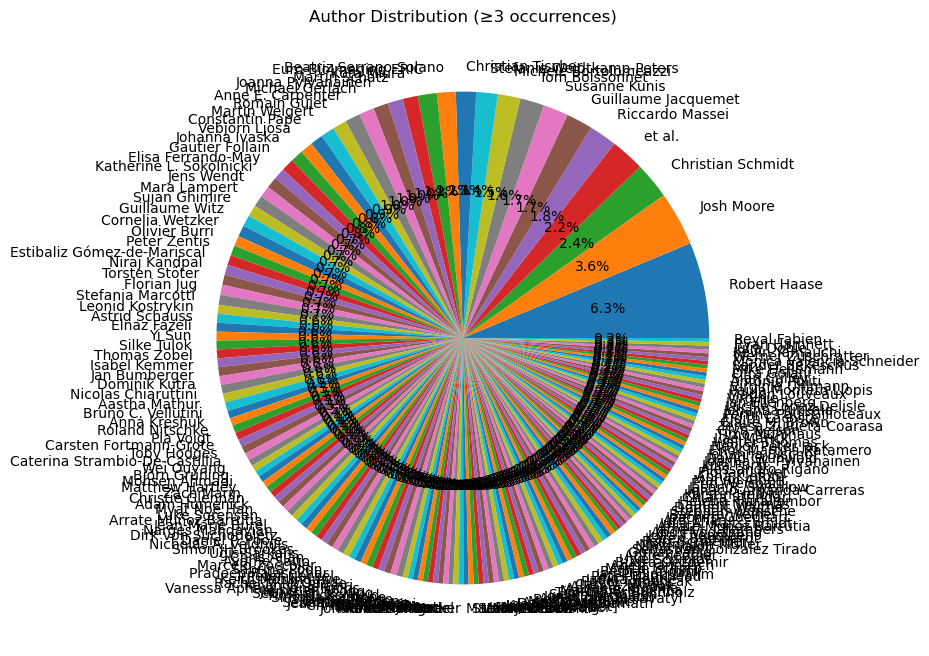

In [7]:
num_min_authorships = 3

import matplotlib.pyplot as plt

# Count author occurrences
author_counts = pd.Series(authors).value_counts()

# Filter authors with >=3 occurrences
author_counts = author_counts[author_counts >= num_min_authorships]

# Create pie chart
plt.figure(figsize=(8, 8))
plt.pie(author_counts, labels=author_counts.index, autopct='%1.1f%%')
plt.title(f'Author Distribution (≥{num_min_authorships} occurrences)')
plt.show()

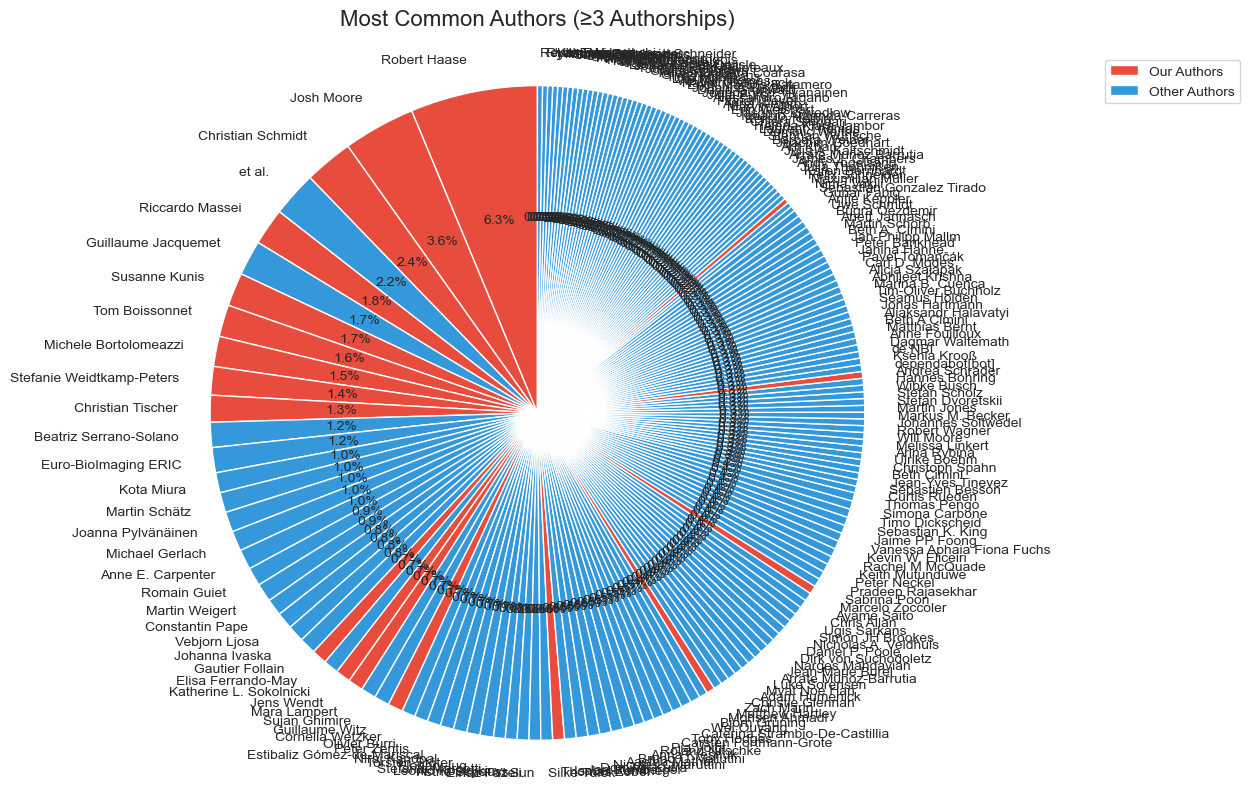

In [8]:
from authors import our_authors
import seaborn as sns
from matplotlib.patches import Patch

# Set seaborn style
sns.set_style("whitegrid")

# Count authors and filter for those with at least 3 occurrences
frequent_authors = author_counts[author_counts >= 3]

# Create colors based on whether authors are in our_authors
colors = []
for author in frequent_authors.index:
    if author in our_authors:
        colors.append('#e74c3c')  # Red for our authors
    else:
        colors.append('#3498db')  # Blue for other authors

# Create the pie chart
plt.figure(figsize=(12, 8))
wedges, texts, autotexts = plt.pie(frequent_authors.values, 
                                   labels=frequent_authors.index,
                                   colors=colors,
                                   autopct='%1.1f%%',
                                   startangle=90)

plt.title('Most Common Authors (≥3 Authorships)', fontsize=16, pad=20)

# Create legend
legend_elements = [Patch(facecolor='#e74c3c', label='Our Authors'),
                  Patch(facecolor='#3498db', label='Other Authors')]
plt.legend(handles=legend_elements, loc='upper right', bbox_to_anchor=(1.3, 1))

plt.axis('equal')
plt.tight_layout()
plt.show()

In [9]:
for n,f in frequent_authors.items():
    print(n,":",f)

Robert Haase : 76
Josh Moore : 43
Christian Schmidt : 29
et al. : 27
Riccardo Massei : 22
Guillaume Jacquemet : 21
Susanne Kunis : 20
Tom Boissonnet : 19
Michele Bortolomeazzi : 18
Stefanie Weidtkamp-Peters : 17
Christian Tischer : 16
Beatriz Serrano-Solano : 15
Euro-BioImaging ERIC : 15
Kota Miura : 12
Martin Schätz : 12
Joanna Pylvänäinen : 12
Michael Gerlach : 12
Anne E. Carpenter : 12
Romain Guiet : 11
Martin Weigert : 11
Constantin Pape : 10
Vebjorn Ljosa : 10
Johanna Ivaska : 10
Gautier Follain : 10
Elisa Ferrando-May : 9
Katherine L. Sokolnicki : 9
Jens Wendt : 9
Mara Lampert : 9
Sujan Ghimire : 9
Guillaume Witz : 9
Cornelia Wetzker : 9
Olivier Burri : 8
Peter Zentis : 8
Estibaliz Gómez-de-Mariscal : 8
Niraj Kandpal : 8
Torsten Stöter : 8
Florian Jug : 8
Stefania Marcotti : 8
Leonid Kostrykin : 7
Astrid Schauss : 7
Elnaz Fazeli : 7
Yi Sun : 7
Silke Tulok : 7
Thomas Zobel : 7
Isabel Kemmer : 7
Jan Bumberger : 7
Dominik Kutra : 7
Nicolas Chiaruttini : 7
Aastha Mathur : 7
Bruno C. 